In [1]:
# test.py
import sys
sys.path.append('/software/pc24403/tfpcbpggsz/amp_ampgen_test')
from D0ToKSpipi2018 import *

# Create an instance to check if the issue is resolved
obj = PyD0ToKSpipi2018()
obj.init()  # Call some methods to ensure functionality

D0ToKSpipi2018 (Apr 30 2024) ==> Initialization !


In [13]:
import numpy as np
import time

np.random.seed(int(time.time()))
seed = np.random.randint(0, 40)
print('Seed:', seed )
mc_path = '/shared/scratch/pc24403/amp_ampgen_noeff'
amp_dk_dd_p = np.load(mc_path + '/Int_b2dk_DD_p_amp.npy')
amp_dk_dd_p = amp_dk_dd_p[0,seed*500000:(seed+1)*500000]

Seed: 2


In [27]:
amp_dk_dd_p

array([-0.03904967-0.38097109j, -1.01099679+1.64594597j,
       -0.23689213-0.66370913j, ..., -0.23309395+0.60347721j,
       -0.4572485 -0.15231695j, -0.64461418-0.23112414j])

In [6]:
import uproot as up
import numpy as np

import matplotlib.pyplot as plt
int_path='/shared/scratch/pc24403/cpfit_sig_noeff/sub/'
f = up.open(int_path+'tuple.root:DalitzEventList')
branch_names = ["_1_K0S0_E", "_1_K0S0_Px", "_1_K0S0_Py", "_1_K0S0_Pz",
                         "_2_pi#_E", "_2_pi#_Px", "_2_pi#_Py", "_2_pi#_Pz",
                         "_3_pi~_E", "_3_pi~_Px", "_3_pi~_Py", "_3_pi~_Pz"]


array = f.arrays(branch_names)
_p1 = np.asarray([array["_1_K0S0_E"], array["_1_K0S0_Px"], array["_1_K0S0_Py"], array["_1_K0S0_Pz"]], dtype=np.float32)
_p2 = np.asarray([array["_2_pi#_E"], array["_2_pi#_Px"], array["_2_pi#_Py"], array["_2_pi#_Pz"]], dtype=np.float32)
_p3 = np.asarray([array["_3_pi~_E"], array["_3_pi~_Px"], array["_3_pi~_Py"], array["_3_pi~_Pz"]], dtype=np.float32)

# convert 4*1000 into a vectot<double>
p1 = np.transpose(_p1)
p2 = np.transpose(_p2)
p3 = np.transpose(_p3)

p1bar = np.hstack((p1[:, :1], np.negative(p1[:, 1:])))
p2bar = np.hstack((p2[:, :1], np.negative(p2[:, 1:])))
p3bar = np.hstack((p3[:, :1], np.negative(p3[:, 1:])))



FileNotFoundError: [Errno 2] No such file or directory: '/shared/scratch/pc24403/cpfit_sig_noeff/sub/tuple.root'

In [15]:
import uproot as up
import numpy as np

import matplotlib.pyplot as plt
int_path='/shared/scratch/pc24403/gen_int/'
f = up.open(int_path+'Int_MC_1.root:DalitzEventList')
branch_names = ["_1_K0S0_E", "_1_K0S0_Px", "_1_K0S0_Py", "_1_K0S0_Pz",
                         "_2_pi#_E", "_2_pi#_Px", "_2_pi#_Py", "_2_pi#_Pz",
                         "_3_pi~_E", "_3_pi~_Px", "_3_pi~_Py", "_3_pi~_Pz"]


array = f.arrays(branch_names)
_p1 = np.asarray([array["_1_K0S0_E"], array["_1_K0S0_Px"], array["_1_K0S0_Py"], array["_1_K0S0_Pz"]], dtype=np.float32)
_p2 = np.asarray([array["_2_pi#_E"], array["_2_pi#_Px"], array["_2_pi#_Py"], array["_2_pi#_Pz"]], dtype=np.float32)
_p3 = np.asarray([array["_3_pi~_E"], array["_3_pi~_Px"], array["_3_pi~_Py"], array["_3_pi~_Pz"]], dtype=np.float32)

# convert 4*1000 into a vectot<double>
p1 = np.transpose(_p1)
p2 = np.transpose(_p2)
p3 = np.transpose(_p3)

p1bar = np.hstack((p1[:, :1], np.negative(p1[:, 1:])))
p2bar = np.hstack((p2[:, :1], np.negative(p2[:, 1:])))
p3bar = np.hstack((p3[:, :1], np.negative(p3[:, 1:])))



In [8]:
def get_mass(p1,p2):
    return ((p1[:,0]+p2[:,0])**2 - (p1[:,1]+p2[:,1])**2 - (p1[:,2]+p2[:,2])**2 - (p1[:,3]+p2[:,3])**2)


In [16]:
s12 = get_mass(p1, p2)
s13 = get_mass(p1, p3)
s23 = get_mass(p2, p3)

In [3]:
print(p1[1])
print(p2[1])
print(p3[1])


[ 0.6936333  -0.3143141  -0.05716408  0.36255533]
[ 0.65247065  0.19869752 -0.42380732 -0.43260232]
[0.51873606 0.11561657 0.4809714  0.07004699]


(array([357., 569., 646., 689., 685., 719., 733., 677., 663., 627., 589.,
        528., 471., 485., 388., 349., 311., 245., 181.,  88.]),
 array([0.40647155, 0.53478479, 0.66309798, 0.79141122, 0.9197244 ,
        1.04803765, 1.17635083, 1.30466402, 1.43297732, 1.5612905 ,
        1.68960369, 1.81791699, 1.94623017, 2.07454348, 2.20285654,
        2.33116984, 2.45948291, 2.58779621, 2.71610951, 2.84442258,
        2.97273588]),
 <BarContainer object of 20 artists>)

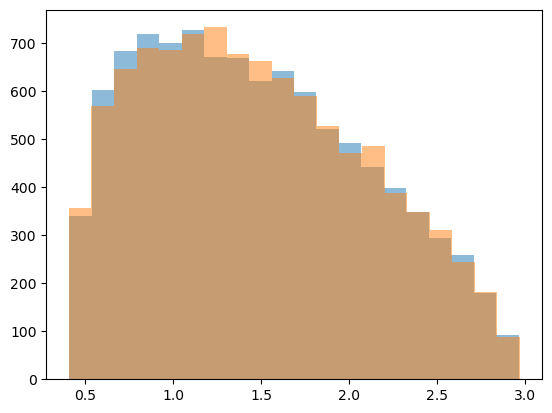

In [17]:
plt.hist(s12, bins=20, alpha=0.5, label='s12')
plt.hist(s13, bins=20, alpha=0.5, label='s13')

In [6]:
amp = []
ampbar = []
for i in range(10000000):
    amp.append(obj.AMP(p1[i].tolist(), p2[i].tolist(), p3[i].tolist()))
    ampbar.append(obj.AMP(p1bar[i].tolist(), p3bar[i].tolist(), p2bar[i].tolist())*-1)
amp = np.array(amp)
ampbar = np.array(ampbar)

In [22]:
print(amp[1])
print(ampbar[1])
print(ampbar[1]*complex(-1,-1))
print(abs(ampbar[1]))
print(abs(amp[1]*complex(0,1)))


(-0.41353378014802666-0.6156764600169077j)
(0.15641408220011094+0.6759340199290184j)
(0.5195199377289075-0.8323481021291292j)
0.6937954773619569
0.7416654843947286


In [14]:
s12.shape

(10000000,)

In [16]:
def DeltadeltaD(A, Abar):
    var = np.angle(A*np.conj(Abar))

    return var

def DeltadeltaD_alt(A, Abar):
    var_a = np.angle(A*np.conj(Abar))+np.pi
    var_b = np.where(var_a < -np.pi, var_a+2*np.pi, var_a)
    var = np.where(var_b > np.pi, var_b-2*np.pi, var_b)

    return var

In [17]:
phaseDiff = DeltadeltaD(amp, ampbar)
phaseDiff_alt = DeltadeltaD_alt(amp, ampbar)

In [18]:
print(np.mean(np.abs(amp)**2))
print(np.mean(np.abs(ampbar)**2))
AAbar = np.abs(amp)*np.abs(ampbar)
real_part = np.mean(AAbar*np.cos(phaseDiff))
imag_part = np.mean(AAbar*np.sin(phaseDiff))
print(real_part)
print(imag_part)

real_part_alt = np.mean(AAbar*np.cos(phaseDiff_alt))
imag_part_alt = np.mean(AAbar*np.sin(phaseDiff_alt))
print(real_part_alt)
print(imag_part_alt)

1.2289503721458501
1.2288782355080063
-0.10715756197051574
0.0002602007694362443
0.10715756197051576
-0.00026020076943624446


(array([ 3796.17292623,  6514.40701233,  9670.37583688, 12614.19095084,
        13843.93040999, 13404.6693219 , 13483.11109584, 13032.55423868,
        12431.13386172, 11953.45506691, 11224.14661512, 10714.50781242,
        10112.05535856,  9060.32904697,  7016.49770058,  5529.86218221,
         5905.95477668,  6731.84210271,  7325.14639443,  7975.40770245,
         8305.34285692,  8860.81032573,  9801.20024925, 10307.2001283 ,
        12017.34751417, 13467.09754377, 15905.85630002, 20057.08423171,
        23532.61434012, 26640.98863919, 27859.59894051, 28629.90322482,
        27592.50813785, 27163.93308383, 25073.16162734, 24646.09346677,
        23499.53705716, 21546.70286427, 20423.76214626, 19156.36317736,
        17260.06725584, 16948.69624822, 15304.62601301, 14156.85631839,
        13238.29658708, 11533.59115207, 10343.64187666,  9805.60209305,
         8616.74029993,  8123.66810511,  6989.16015349,  6291.38987623,
         5814.63474281,  5149.95642454,  4739.35909191,  4276.59

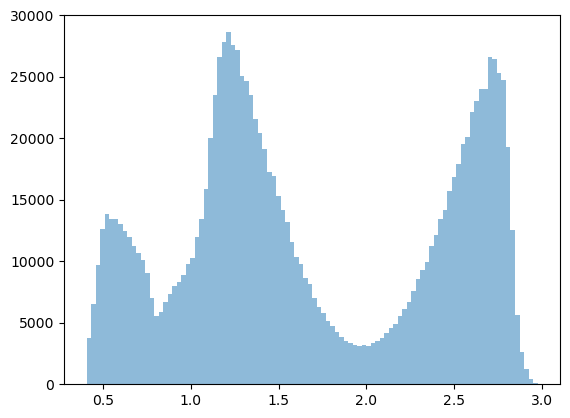

In [18]:
plt.hist(s13[:1000000].tolist(), bins=100, alpha=0.5, label='s13', weights=(np.abs(amp)**2).tolist())

(array([  6665.30077406,   9725.48017712,  10432.94618702,  10515.59713748,
         10579.59709845,  11003.70501993,  11053.88230389,  11616.69139519,
         12676.65533147,  14073.77309721,  17203.60552546,  23475.5955395 ,
         37763.88784021,  70511.79898965, 126187.84862382, 145594.15250379,
        101697.00641244,  63878.71838033,  42749.34774884,  31461.04469139,
         24395.83921044,  20010.87415072,  16394.49420891,  14455.37044247,
         12598.64447278,  11305.08473814,   9888.54248918,   8986.92814238,
          8196.24577799,   7655.25487686,   7113.48005034,   6704.92071124,
          6407.77576733,   6049.60300961,   5822.87097859,   5523.81829317,
          5197.84253003,   5094.59515866,   4902.29377077,   4776.64845638,
          4807.43723596,   4563.6533903 ,   4486.61247091,   4450.26757279,
          4380.66660324,   4435.93471205,   4407.56368796,   4447.26702927,
          4442.19744833,   4470.47173293,   4383.90288213,   4629.68774658,
          45

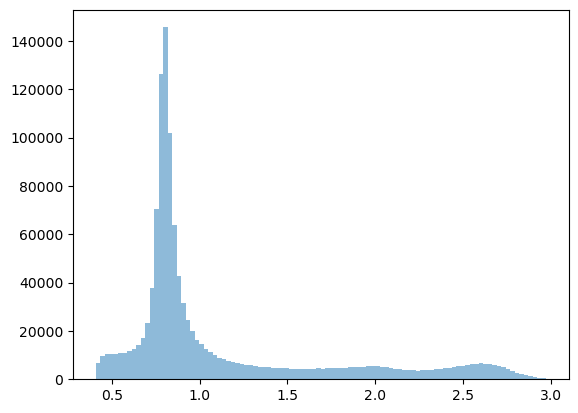

In [30]:
plt.hist(s12[:1000000].tolist(), bins=100, alpha=0.5, label='s12', weights=(np.abs(amp)**2).tolist())

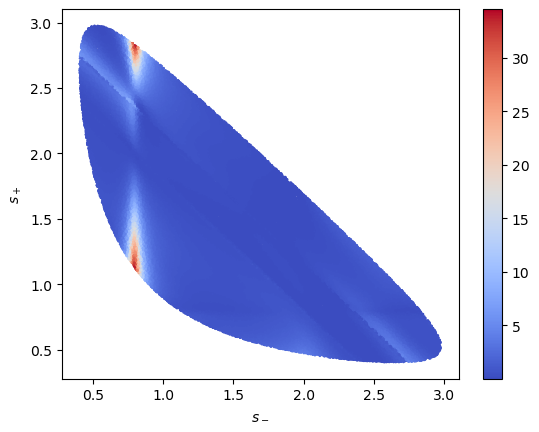

In [ ]:
plt.scatter(s12, s13, c=np.abs(amp)**2, cmap='coolwarm', s=1)
plt.xlabel('$s_-$')
plt.ylabel('$s_+$')
plt.colorbar()

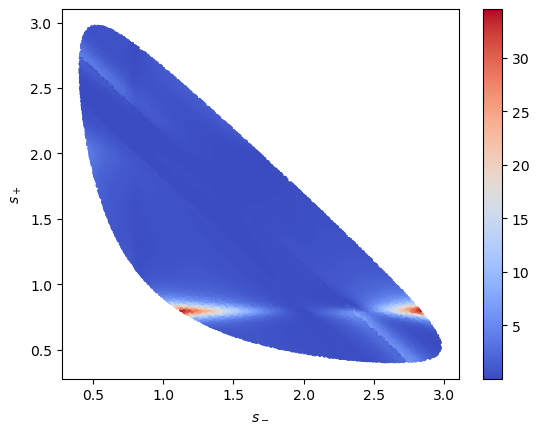

In [ ]:
plt.scatter(s12, s13, c=np.abs(ampbar)**2, cmap='coolwarm', s=1)
plt.xlabel('$s_-$')
plt.ylabel('$s_+$')
plt.colorbar()

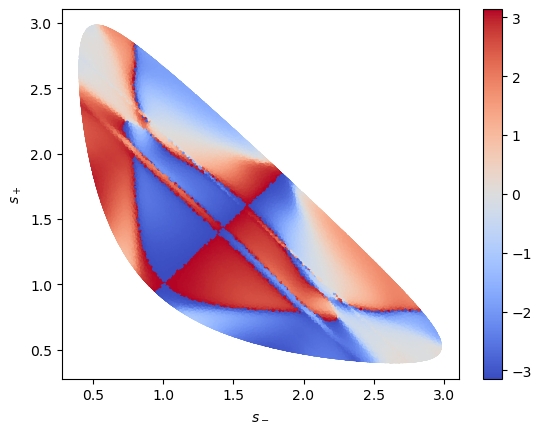

In [ ]:
plt.scatter(s12[:1000000], s13[:1000000], c=phaseDiff, cmap='coolwarm', s=1)
plt.xlabel('$s_-$')
plt.ylabel('$s_+$')
plt.colorbar() 

In [14]:
# read from txt file with format 'A Abar DeltaD' in amplittude.txt
amp_ampgen = []
ampbar_ampgen = []
phaseDiff_ampgen = []
with open('/shared/scratch/pc24403/cpfit_sig_noeff/sub/amplitudes.txt', 'r') as f:
    for line in f:
        amp_ampgen.append(float(line.split()[0]))
        ampbar_ampgen.append(float(line.split()[1]))
        phaseDiff_ampgen.append(float(line.split()[2]))
        if len(amp_ampgen) == 10000000:
            break


In [7]:
int_path='/software/pc24403/PCBPGGSZ/outputs/toy/root/'
f = up.open(int_path+'weighted_noeff.root:DalitzEventList')
branch_names = ["_1_K0S0_E", "_1_K0S0_Px", "_1_K0S0_Py", "_1_K0S0_Pz",
                         "_2_pi#_E", "_2_pi#_Px", "_2_pi#_Py", "_2_pi#_Pz",
                         "_3_pi~_E", "_3_pi~_Px", "_3_pi~_Py", "_3_pi~_Pz"]


array = f.arrays(branch_names)
_p1 = np.asarray([array["_1_K0S0_E"], array["_1_K0S0_Px"], array["_1_K0S0_Py"], array["_1_K0S0_Pz"]])
_p2 = np.asarray([array["_2_pi#_E"], array["_2_pi#_Px"], array["_2_pi#_Py"], array["_2_pi#_Pz"]])
_p3 = np.asarray([array["_3_pi~_E"], array["_3_pi~_Px"], array["_3_pi~_Py"], array["_3_pi~_Pz"]])

# convert 4*1000 into a vectot<double>
p1 = np.transpose(_p1)
p2 = np.transpose(_p2)
p3 = np.transpose(_p3)

p1bar = np.hstack((p1[:, :1], np.negative(p1[:, 1:])))
p2bar = np.hstack((p2[:, :1], np.negative(p2[:, 1:])))
p3bar = np.hstack((p3[:, :1], np.negative(p3[:, 1:])))



KeyboardInterrupt: 

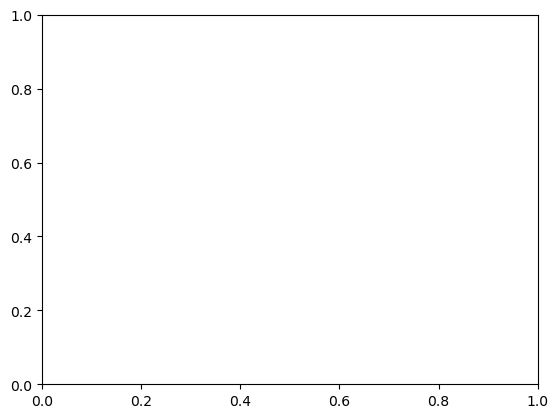

In [32]:
plt.hist(s13[:10000000].tolist(), bins=100, alpha=0.5, label='s13', weights=(np.abs(amp_ampgen)**2).tolist(), histtype='step')
plt.hist(s13[:10000000].tolist(), bins=100, alpha=0.5, label='s13', weights=(np.abs(ampbar)**2).tolist(), histtype='step')


In [11]:
print(abs(amp[2]))
print(abs(ampbar[2]))

1.3035433283300308
0.712880232196693


In [10]:
print(amp_ampgen[2])
print(ampbar_ampgen[2])

1.30354
0.71288


In [12]:
s12_ampgen, s13_ampgen = get_mass(p1[:1000000], p2[:1000000]), get_mass(p1[:1000000], p3[:1000000])

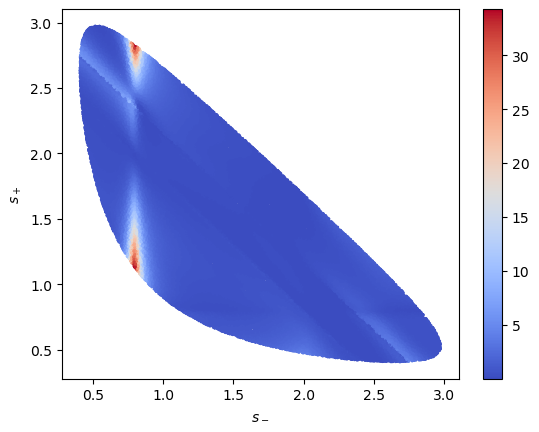

In [ ]:
plt.scatter(s12_ampgen, s13_ampgen, c=np.abs(amp[:100000])**2 cmap='coolwarm', s=1)
plt.xlabel('$s_-$')
plt.ylabel('$s_+$')
plt.colorbar()

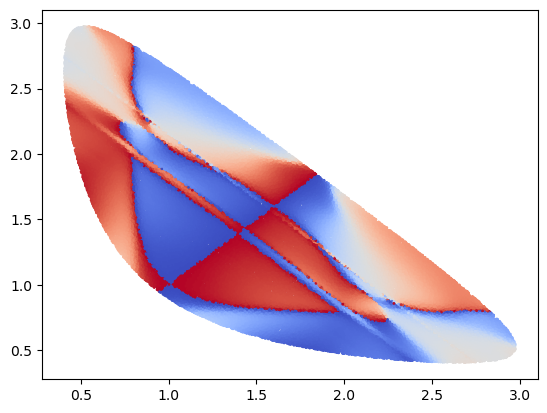

In [ ]:
plt.scatter(s12_ampgen, s13_ampgen, c=phaseDiff[:100000], cmap='coolwarm', s=1)

In [15]:
print(np.mean(np.abs(amp_ampgen)**2))
print(np.mean(np.abs(ampbar_ampgen)**2))
AAbar = np.array(amp_ampgen)*np.array(ampbar_ampgen)
real_part = np.mean(AAbar*np.cos(phaseDiff_ampgen))
imag_part = np.mean(AAbar*np.sin(phaseDiff_ampgen))
print(real_part)
print(imag_part)

1.228950376197287
1.228878237473732
-0.10715756093365955
0.00026020039035674783


In [14]:
print(np.mean(np.abs(amp)**2))
print(np.mean(np.abs(ampbar)**2))
AAbar = np.abs(amp)*np.abs(ampbar)
real_part = np.mean(AAbar*np.cos(phaseDiff))
imag_part = np.mean(AAbar*np.sin(phaseDiff))
print(real_part)
print(imag_part)

1.2265254568668686
1.228647148145268
-0.10600154104696555
0.00019058020255201732


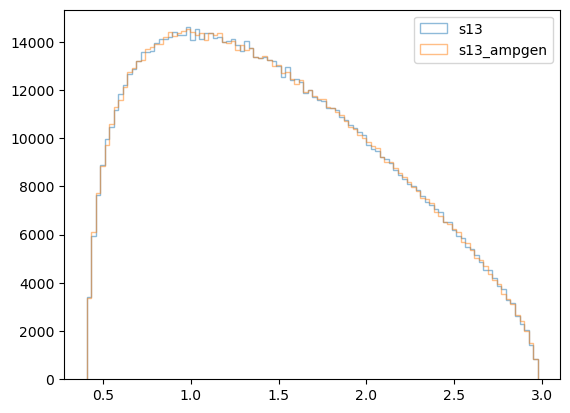

In [13]:
plt.hist(s13[:1000000].tolist(), bins=100, alpha=0.5, label='s13',histtype='step')
plt.hist(s13_ampgen[:1000000].tolist(), bins=100, alpha=0.5, label='s13_ampgen',histtype='step')
plt.legend()